# Training the model using the data we collected

![alt text](https://raw.githubusercontent.com/rajeevratan84/DeepLearningCV/master/amer_sign2.png "Amer Sign")




In [2]:
# Load our libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

In [3]:
# Get our Training and Test Data
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [4]:
# Inspect our Training data
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,195.0,195.0,194.0,193.0,193.0,193.0,193.0,193.0,192.0,...,95.0,99.0,99.0,155.0,151.0,152.0,147.0,146.0,146.0,146.0
1,0,194.0,194.0,194.0,193.0,193.0,193.0,193.0,193.0,192.0,...,92.0,97.0,99.0,156.0,150.0,150.0,147.0,146.0,146.0,146.0
2,0,195.0,194.0,194.0,193.0,192.0,192.0,193.0,193.0,192.0,...,94.0,96.0,100.0,156.0,152.0,150.0,147.0,146.0,146.0,146.0
3,0,195.0,195.0,194.0,193.0,193.0,192.0,192.0,192.0,192.0,...,93.0,95.0,99.0,153.0,153.0,150.0,147.0,146.0,146.0,146.0
4,0,194.0,194.0,194.0,193.0,193.0,193.0,193.0,192.0,192.0,...,89.0,95.0,103.0,157.0,153.0,147.0,147.0,146.0,146.0,146.0


In [5]:
# Get our training labels
labels = train['label'].values

In [6]:
# View the unique labels, 24 in total (no 9)
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [7]:
# Plot the quantities in each class
#plt.figure(figsize = (18,8))
#sns.countplot(x =labels)

In [8]:
# Drop Training Labels from our training data so we can separate it 
train.drop('label', axis = 1, inplace = True)

In [9]:
# Extract the image data from each row in our csv, remember it's in a row of 784 columns
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [10]:
# hot one encode our labels
from sklearn.preprocessing import LabelBinarizer

label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [11]:
# View our labels
labels
# len(labels[0])

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


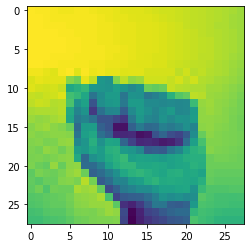

In [12]:
# Inspect an image
index = 2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [ ]:
# Use OpenCV to view 10 random images from our training data
#import cv2
#import numpy as np

#for i in range(0,10):
#    rand = np.random.randint(0, len(images))
#    input_im = images[rand]
#    sample = input_im.reshape(28,28).astype(np.uint8)
#    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)
#    cv2.imshow("sample image", sample)
#    cv2.waitKey(0) 
    
#cv2.destroyAllWindows()

In [ ]:
# Split our data into x_train, x_test, y_train and y_test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [ ]:
# Start loading our tensorFlow modules and define our batch size etc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 25
epochs = 10

In [ ]:
# Scale our images
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
# Reshape them into the size required by TF and Keras
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

plt.imshow(x_train[0].reshape(28,28))

In [ ]:
# Create our CNN Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam 

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(25, activation = 'softmax'))

In [ ]:
# Compile our Model
model.compile(loss = 'categorical_crossentropy',
              optimizer= Adam(),
              metrics=['accuracy'])

In [ ]:
print(model.summary())

In [ ]:
# Train our Model
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

In [ ]:
# Save our Model
model.save("model.h5")
print("Model Saved")

In [ ]:
# View our training history graphically
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [ ]:
# Reshape our test data so that we can evaluate it's performance on unseen data
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)

test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binrizer.fit_transform(test_labels)

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

test_images.shape

y_pred = model.predict(test_images)

In [ ]:
# Get our accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred.round())